In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [2]:
df = pd.read_excel('./random_forest_dataset.xlsx',header=1)
df.head()

,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
0,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2,A
1,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A
2,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2,A
3,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8,A
4,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0,A


In [3]:
df.isnull().sum()

Sl No     0
USN       0
Name      0
Title     1
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        8
T1        8
P3T       0
Total     0
Grade     8
dtype: int64

In [4]:
df.columns

Index(['Sl No ', 'USN ', 'Name ', 'Title ', 'P1 ', 'C1', 'P2', 'C2', 'P3',
       'C3', 'R1', 'T1', 'P3T', 'Total ', 'Grade'],
      dtype='object')

In [5]:
# handle outliers 
df.dropna(inplace=True)
# there is this extra space after the column names 
x = df.drop(['Sl No ',"USN ","Name ","Title ","Grade"],axis=1)
y = df.Grade

In [6]:
x.head()


,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
0,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2
1,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0
2,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2
3,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8
4,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0


In [7]:
y

0      A
1      A
2      A
3      A
4      A
      ..
110    B
112    S
113    S
114    S
116    B
Name: Grade, Length: 109, dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Grade'])

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


Total     0.262605
P2        0.127993
P3T       0.124253
C2        0.110560
P1        0.098956
C1        0.077943
P3        0.060773
C3        0.058479
R1        0.046368
T1        0.032069
dtype: float64


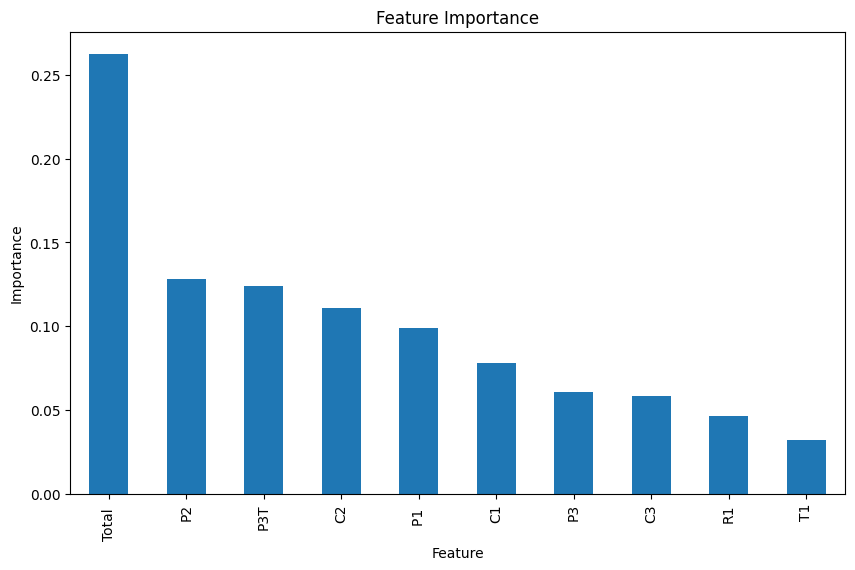

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid correctly
param_grid = {
    'n_estimators': [100, 200, 300],  # Fixed key name
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Fixed "min_samples_lear" typo
}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs=1,verbose=2)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


/home/harsha/Desktop/AAA_Lab_CIE/DS/elenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total tim

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [28]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [29]:
best_rf = RandomForestClassifier(random_state=42,**best_params)
best_rf.fit(x_train,y_train)
y_pred = best_rf.predict(x_test)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    classification_report
)


In [31]:
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.8182
 Precision: 0.7966
 Recall: 0.8182
 F1 Score: 0.7946

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.60      0.75      0.67         4
           2       0.00      0.00      0.00         2
           3       1.00      0.77      0.87        13

    accuracy                           0.82        33
   macro avg       0.59      0.63      0.60        33
weighted avg       0.80      0.82      0.79        33



/home/harsha/Desktop/AAA_Lab_CIE/DS/elenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/harsha/Desktop/AAA_Lab_CIE/DS/elenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/harsha/Desktop/AAA_Lab_CIE/DS/elenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

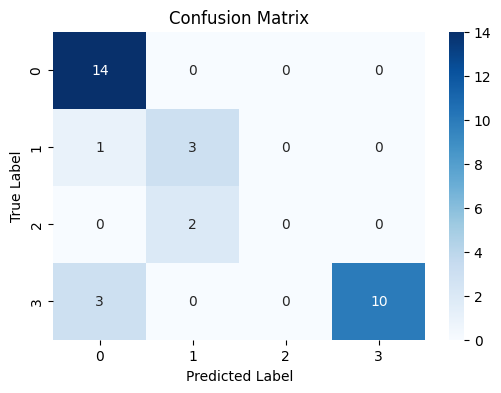

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
